In [1]:
import numpy as np
from numpy.linalg import LinAlgError
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

In [2]:
def find_nn(X, k, ind):
    '''
    Find the indexes of the k nearest neighbors of a particular data point
    @:param X: Input data
    @:param k: k nearest neighbor to consider
    @:param ind: The index of the target data point
    '''
    res = []
    distances = []
    for i in range(X.shape[1]):
        if i == ind:
            distances.append(np.inf)
        else:
            distances.append(np.linalg.norm(X[:, ind]-X[:, i]))
    return np.argsort(distances)[:k]
        
def getW(X, k):
    '''
    @:param X: Input data
    @:param k: k nearest neighbor to consider
    '''
    W = np.zeros((X.shape[1], X.shape[1]))
    for i in range(X.shape[1]):
        C = np.zeros((k, k))
        nn_inds = find_nn(X, k, i)
        for m in range(k):
            for n in range(m, k):
                C[m][n] = np.dot(X[:, i]-X[:, nn_inds[m]], X[:, i]-X[:, nn_inds[n]])
                C[n][m] = C[m][n]
#         print(C)
        # solve for Cw = 1
        try:
            w = np.linalg.inv(C) @ np.ones((k, 1))
        except LinAlgError:
            C += 1e-3*np.trace(C) * np.eye(k)  # if C is singular, add small regularization
            w = np.linalg.inv(C) @ np.ones((k, 1))
        # normalize C to have 1-norm of 1
        w = w/np.sum(w)
        
        for m in range(k):
            W[i][nn_inds[m]] = w[m]
        
    return np.array(W)

def getY(W, n_components):
    M = (np.eye(W.shape[0]) - W).T @ (np.eye(W.shape[0]) - W)
    s, v = np.linalg.eig(M)
    v = v[:, np.argsort(s)[1:]]
#     print(v.shape)
    return v[:, :n_components].T

def lle(X, k, n_components=2):
    '''
    @:param X: Input data
    @:param k: k nearest neighbor to consider
    '''
    X = np.array(X)
    W = getW(X, k)
    return getY(W, n_components)

In [3]:
animals = ['Dove','Hen','Duck','Goose','Owl','Hawk','Eagle','Fox','Dog','Wolf','Cat','Tiger','Lion','Horse','Zebra','Cow']
features = ['small size','medium size','large size','2 legs','4 legs','hair','hooves','mane','feathers','hunts','runs','flys','swims']

M = [ [ 1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 , 0 ] ,
[0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 , 0 ] ,
[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 , 1 ] ,
[1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 , 0 ] ,
[0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 , 1 ] ,
[0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 , 1 ] ,
[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 , 1 ] ,
[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,1 , 0 ] ,
[1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 , 0 ] ,
[0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,0 , 0 ] ,
[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 , 0 ] ,
[1 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 , 0 ] ,
[0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 , 0 ] ]
M = np.array(M)

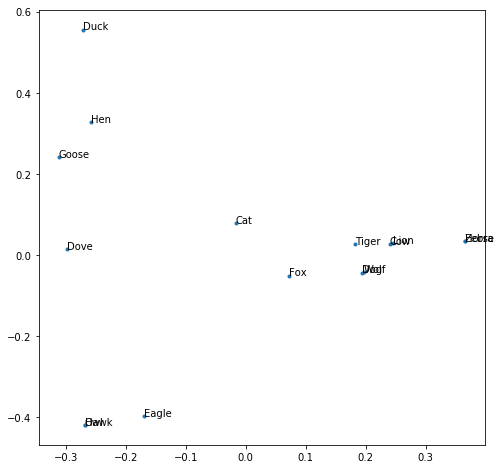

In [4]:
res = lle(M,7, 2)
# print(res.shape)
plt.figure(figsize=(8,8))
plt.plot(res[0, :], res[1, :], '.')
for i in range(16):
    plt.text(res[0, i], res[1, i], animals[i])
plt.show()

## Generate data for Problem 2 and 3

In [2]:
np.random.seed(16)
# generate hyperplane
w = np.random.rand(2,1)
b = np.random.rand()
print(w, b)

[[ 0.22329108]
 [ 0.52316334]] 0.5507014565811811


In [3]:
# generate separable data
x = []
y = []
while True:
    tmp = np.random.rand(2,1)*20 - 10
    if w.T@tmp + b > 0:
        x.append(tmp)
        y.append(-1)
    if len(x) == 10:
        break
while True:
    tmp = np.random.rand(2,1)*20 - 10
    if w.T@tmp + b < 0:
        x.append(tmp)
        y.append(1)
    if len(x) == 20:
        break
x = np.rollaxis(np.array(x).squeeze(), 1, 0)
y = np.array(y)

In [4]:
# Linearly separable data
x_sep, y_sep = np.copy(x), np.copy(y)

In [5]:
# Create non-separable data (add two additional points)
x_nonsep, y_nonsep = np.copy(x), np.copy(y)
x_nonsep = np.append(x_nonsep, [[0.0], [0.0]], axis=1)
x_nonsep = np.append(x_nonsep, [[-4.0], [0.0]], axis=1)
y_nonsep = np.append(y_nonsep, 1)
y_nonsep = np.append(y_nonsep, -1)

In [6]:
def plot_data(separable, hyperplane=None):
    plt.figure(figsize=(8,8))
    plt.plot(x_sep[0, :10], x_sep[1, :10], 'k+', mew=2.5, markersize=10)
    plt.plot(x_sep[0, 10:], x_sep[1, 10:], 'k_', mew=2.5, markersize=10)
    plt.plot([-10,10], [(-b+10*w[0])/w[1], (-b-10*w[0])/w[1]], 'r--', label='ground truth')
    if not separable:
        plt.plot(x_nonsep[0, 20], x_nonsep[1, 20], 'k_', mew=2.5, markersize=10)
        plt.plot(x_nonsep[0, 21], x_nonsep[1, 21], 'k+', mew=2.5, markersize=10)
    if hyperplane is not None:
        w_n, b_n = hyperplane
        plt.plot([-10,10], [(-b_n+10*w_n[0])/w_n[1], (-b_n-10*w_n[0])/w_n[1]], 'g', label='SVM')
        plt.plot([-10,10], [(1-b_n+10*w_n[0])/w_n[1], (1-b_n-10*w_n[0])/w_n[1]], 'g:', label='margin 1')
        plt.plot([-10,10], [(-1-b_n+10*w_n[0])/w_n[1], (-1-b_n-10*w_n[0])/w_n[1]], 'g:', label='margin -1')
    plt.legend()
    plt.show()

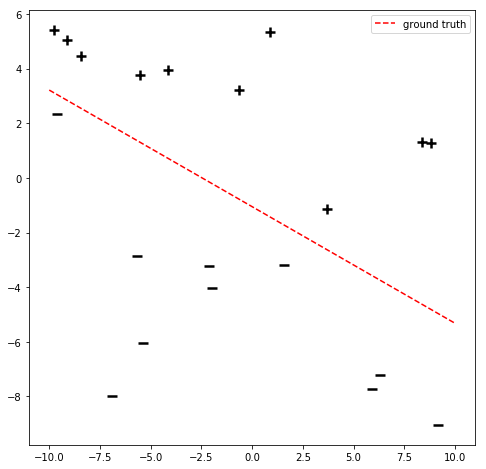

In [7]:
plot_data(separable=True)

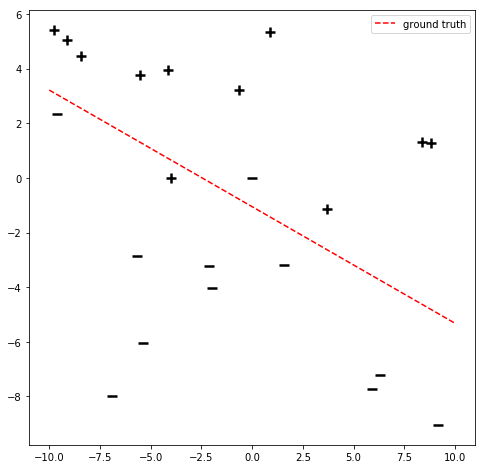

In [8]:
plot_data(separable=False)

# Problem 2

In [9]:
def svm(x, y, separable=False, C=None):
    '''
    Traditional svm
    @:param x: with dimensions of (n_features, n_samples)
    @:return: w and b
    '''
    n, p = x.shape
    print('Data has shape: ', x.shape)

    import matlab.engine
    eng = matlab.engine.start_matlab()    
    
    if separable:
        H = np.eye(n)
        H = np.hstack((H, np.zeros((n, 1))))
        H = np.vstack((H, np.zeros((1, n+1))))

        A = np.hstack(((x*y[None, :]).T, y.reshape((p,1))))
        b = -np.ones((p,1))
        f = np.zeros((n+1,1))
        
        res = eng.quadprog(matlab.double(H.tolist()), matlab.double(f.tolist()),matlab.double(A.tolist()),matlab.double(b.tolist()))
    else:
        if C==None:
            raise ValueError('C cannot be None if data is not linearly separable')
        H = np.eye(n)
        H = np.hstack((H, np.zeros((n, p+1))))
        H = np.vstack((H, np.zeros((p+1, n+p+1))))
        
        A = np.hstack(((x*y[None, :]).T, y.reshape((p,1)), -np.eye(p)))
        b = -np.ones((p,1))
        f = np.vstack((np.zeros((n+1, 1)), C*np.ones((p, 1))))
        lb = np.array([-np.inf]*(n+1) + [0]*p).reshape((n+1+p),1)
        res = eng.quadprog(matlab.double(H.tolist()), matlab.double(f.tolist()),matlab.double(A.tolist()),matlab.double(b.tolist()),
                          matlab.double([]), matlab.double([]), matlab.double(lb.tolist()))

#     print(res)
    w_learned = []
    for i in range(n):
        w_learned.append(res[i][0])
    return w_learned, res[n][0]

In [10]:
# separable data
w_quad, b_quad = svm(x_sep, y_sep, separable=True)

Data has shape:  (2, 20)


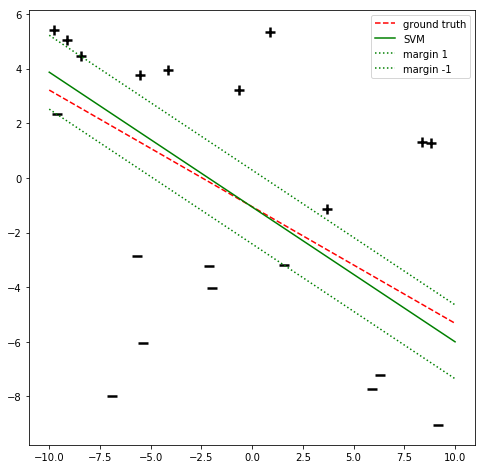

In [11]:
plot_data(separable=True, hyperplane=(w_quad, b_quad))

In [12]:
# non-separable data without regularization
w_quad2, b_quad2 = svm(x_nonsep, y_nonsep, separable=True)

Data has shape:  (2, 22)


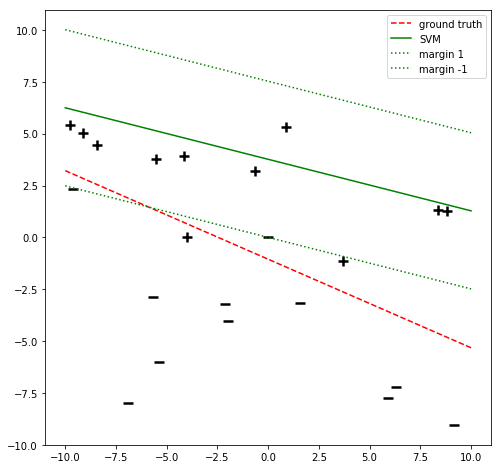

In [13]:
plot_data(separable=False, hyperplane=(w_quad2, b_quad2))

In [14]:
# try with non-separable data
w_quad3, b_quad3 = svm(x_nonsep, y_nonsep, separable=False, C=0.1)

Data has shape:  (2, 22)


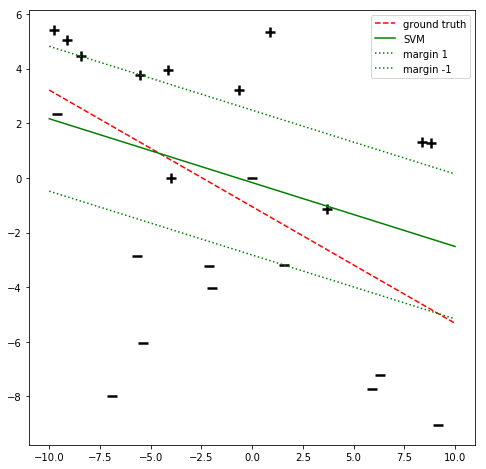

In [15]:
plot_data(separable=False, hyperplane=(w_quad3, b_quad3))

In [16]:
# try with non-separable data and C=10
w_quad4, b_quad4 = svm(x_nonsep, y_nonsep, separable=False, C=10)

Data has shape:  (2, 22)


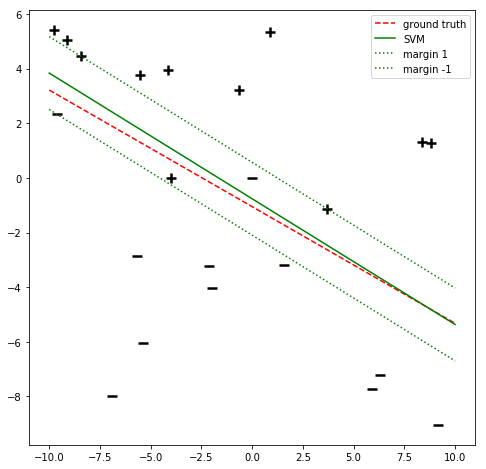

In [17]:
plot_data(separable=False, hyperplane=(w_quad4, b_quad4))

# Problem 3

In [18]:
from scipy.optimize import linprog

In [49]:
def sparse_svm(x, y, separable=False, C=None):
    '''
    @return: return result from linprog
    '''
    n, p = x.shape
    print('Data has shape: ', x.shape)
    if separable:
        a1 = np.hstack((np.eye(n), np.zeros((n, 1)), -np.eye(n)))
        a2 = np.hstack((-np.eye(n), np.zeros((n, 1)), -np.eye(n)))
        a3 = np.hstack(((x*y[None, :]).T, y.reshape((p,1)), np.zeros((p,n))))
        A = np.vstack((a1, a2, a3))
        b = np.vstack((np.zeros((n,1)), np.zeros((n,1)), -np.ones((p,1))))
        c = np.hstack((np.zeros((n)), 0, np.ones(n)))
    else:
        if C==None:
            raise ValueError('C cannot be None if data is not linearly separable')
        a1 = np.hstack((np.eye(n), np.zeros((n, 1)), np.zeros((n, p)),-np.eye(n)))
        a2 = np.hstack((-np.eye(n), np.zeros((n, 1)), np.zeros((n, p)), -np.eye(n)))
        a3 = np.hstack(((x*y[None, :]).T, y.reshape((p,1)), -np.eye(p), np.zeros((p,n))))
        A = np.vstack((a1, a2, a3))
        b = np.vstack((np.zeros((n,1)), np.zeros((n,1)), -np.ones((p,1))))
        c = np.hstack((np.zeros((n)), 0, np.ones((p))*C, np.ones((n))))

    res = linprog(c, A, b)['x']
    return res[:n], res[n]

In [20]:
w_lin, b_lin = sparse_svm(x_sep, y_sep, True)

Data has shape:  (2, 20)


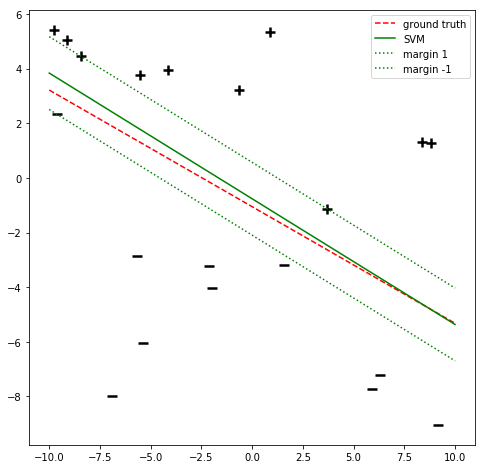

In [21]:
plot_data(separable=True, hyperplane=(w_lin, b_lin))

In [22]:
w_lin2, b_lin2 = sparse_svm(x_nonsep, y_nonsep, True)  # does not work

Data has shape:  (2, 22)


TypeError: 'float' object is not subscriptable

In [23]:
w_lin3, b_lin3 = sparse_svm(x_nonsep, y_nonsep, False, 0.1)

Data has shape:  (2, 22)


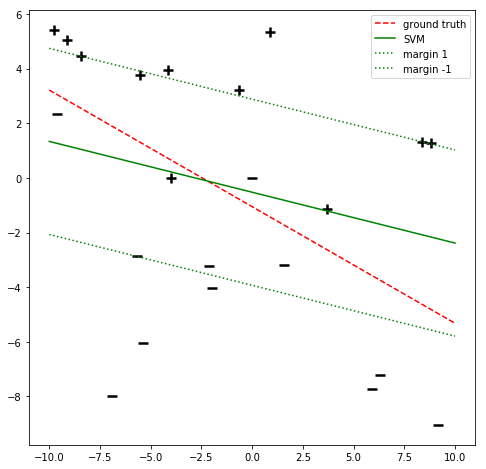

In [24]:
plot_data(separable=False, hyperplane=(w_lin3, b_lin3))

In [25]:
w_lin4, b_lin4 = sparse_svm(x_nonsep, y_nonsep, False, 10)

Data has shape:  (2, 22)


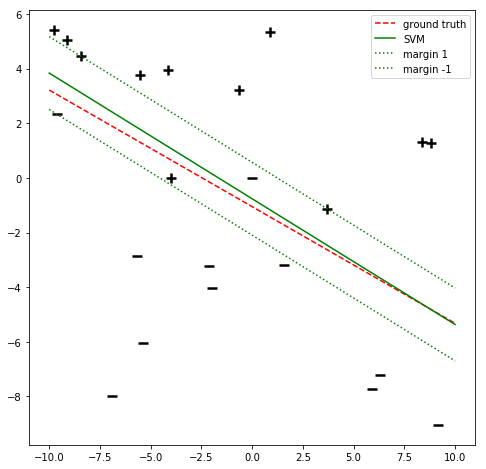

In [26]:
plot_data(separable=False, hyperplane=(w_lin4, b_lin4))

# Problem 4

In [2]:
from scipy.io import loadmat

In [3]:
data = loadmat('./data/IP2classes.mat')

In [4]:
# create data and labels
# take half of data as training and half as testing
# X as 1 and Y as -1, so Y is positive samples
nx, ny = data['X'].shape[1], data['Y'].shape[1]
hsi_training_data = np.hstack((data['X'][:, :nx//2], data['Y'][:, :ny//2]))
hsi_training_labels = np.hstack((np.ones((nx//2)), -np.ones((ny//2))))
hsi_testing_data = np.hstack((data['X'][:, nx//2:], data['Y'][:, ny//2:]))
hsi_testing_labels = np.hstack((np.ones((nx - nx//2)), -np.ones((ny - ny//2))))

In [40]:
w_hsi, b_hsi = svm(hsi_training_data, hsi_training_labels, True)

Data has shape:  (220, 492)


In [41]:
pred_values = (np.array(w_hsi).reshape(1, 220)) @ hsi_testing_data + b_hsi
predicted_labels = (pred_values>0).astype(np.int32) * -1 + (pred_values<=0).astype(np.int32) * 1
print(np.mean(predicted_labels == hsi_testing_labels))

1.0
